In [ ]:
########################################################################
## Pattern Recognition - Practice 3 (Problem 1)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Data Setting

(200, 20)
(200,)


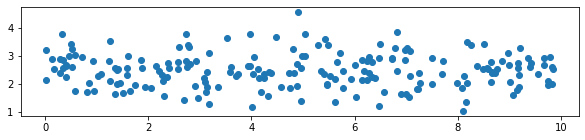

In [ ]:
#####################
## REGRESSION DATA ##
#####################
SIZE_TRAINING_DATA = 200
NOISE_RATIO = 0.5
MIN_RANGE = 0.0
MAX_RANGE = 10.0
FEATURE_DIM = 20

np.random.seed(0)
feature_training = np.random.uniform(MIN_RANGE, MAX_RANGE, [SIZE_TRAINING_DATA, FEATURE_DIM])
label_training = np.mean(np.random.rand(1, FEATURE_DIM)*feature_training, 1) + np.random.randn(SIZE_TRAINING_DATA)*NOISE_RATIO

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[:, 0], label_training)
f.show()

print(feature_training.shape)
print(label_training.shape)
# print(label_training)

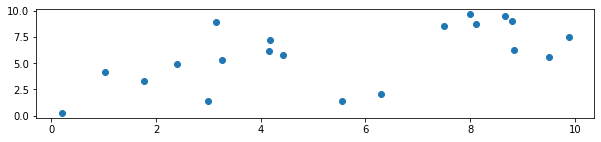

In [ ]:
###############
## TEST DATA ##
###############
SIZE_TEST_DATA = 20

np.random.seed(1)
feature_test = np.random.uniform(MIN_RANGE, MAX_RANGE, [SIZE_TEST_DATA, FEATURE_DIM])

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], feature_test[:, 1])
f.show()

## Problem 2 - A : Estimate this by Ridge regression (Normal Equation)

In [ ]:
# data should be in form of vector (column)
label_test = np.zeros(SIZE_TEST_DATA)
X = np.matrix(feature_training)
y = np.matrix(label_training).T
print(X.shape)
print(y.shape)

(200, 20)
(200, 1)


In [ ]:
# normal equation
def gradient(X, y, l):
  w = np.linalg.inv(X.transpose() * X + l * np.eye(FEATURE_DIM)) * X.transpose() * y
  return w

In [ ]:
w = gradient(X, y, 3)
X_test = feature_test
label_test = np.matmul(X_test, w).tolist()

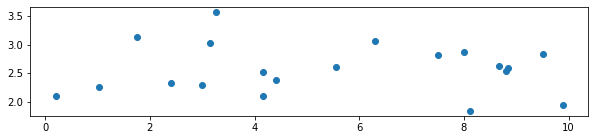

In [ ]:
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], label_test)
f.show()

## Problem 2 - B : Predict by Ridge regression (Gradient Descent)

In [ ]:
label_test = np.zeros(SIZE_TEST_DATA) # Estimate this by Ridge regression (Gradient Descent)

In [ ]:
def predict(X, w):
  return X@w

In [ ]:
w = np.random.randn(20, 1)

# gradient descent
def analytic_gradient(X, w, y, l):
  return X.transpose() @ (X @ w -y) + l * w

lr = 0.000001 # learning rate
for _ in range(20000):
  w = w - lr * analytic_gradient(X, w, y, 3)

label_test = np.matmul(X_test, w).tolist()

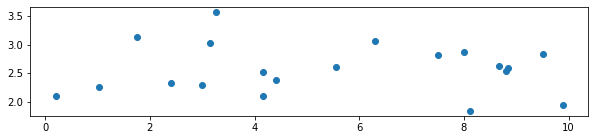

In [ ]:
label_test = predict(feature_test, w).tolist()

############################################################
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], label_test)
f.show()
############################################################

## Problem 2 - C : Noise-robust Ridge regression (Gradient Descent)

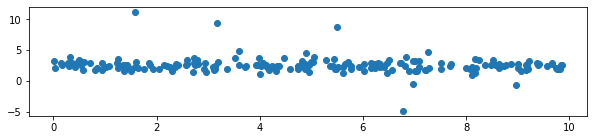

In [ ]:
###########################
## NOISY REGRESSION DATA ##
###########################
SIZE_NOISE_DATA = 10
NOISE_POWER = 5.0

np.random.seed(0)
label_training_noisy = label_training.copy()
label_training_noisy[:SIZE_NOISE_DATA] = np.random.randn(SIZE_NOISE_DATA)*NOISE_POWER

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[:, 0], label_training_noisy)
f.show()

In [ ]:
label_test = np.zeros(SIZE_TEST_DATA) # Estimate this by Noise-robust L1-norm regression (Gradient Descent)

In [ ]:
# calculatel the gradient of huber loss
def huber_gradient(X, w, y, l, e=1):
  r = y - X * w
  # gradient of quadratic loss for y-f(x) <= e
  dw_1 = -1 * np.matmul(X.T, r)
  # gradient of linear loss for y-f(x) > e
  dw_2 = (-1 * X).T * (r / abs(r))

  dw = np.zeros(w.shape)

  # count the ratio of training features of linear case
  linear_ratio = np.count_nonzero(abs(r) > e) / X.shape[0]

  # add up gradients of quadratic and linear losses
  dw += (1.0 - linear_ratio) * dw_1 + linear_ratio * dw_2

  return dw + l * w

# initial weights (randiom with standard normal distribution)
w = np.random.randn(20, 1)

lr = 0.000001 # learning rate
for _ in range(100000):
  # update the gradient of huber loss with noisy training label
  w = w - lr * huber_gradient(X, w, np.matrix(label_training_noisy).T, 3)

# test 
label_test = np.matmul(X_test, w).tolist()

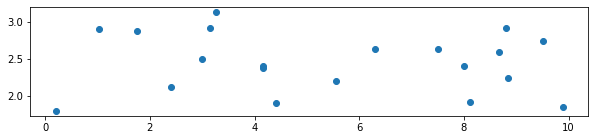

In [ ]:
############################################################
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], label_test)
f.show()